PS: Convolutional Neural Network (CNN) - Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [ ]:
# Import dataset
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
#Load dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
len(train_y)

60000

Dataset Visualization Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

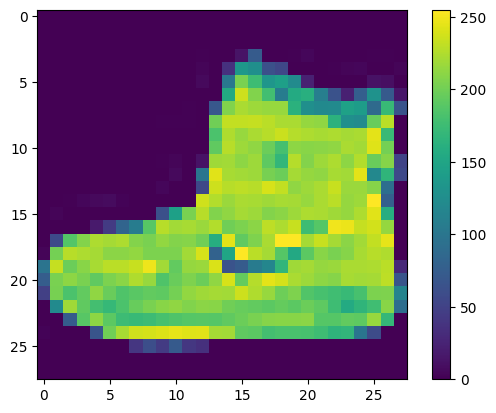

In [ ]:
plt.figure()
plt.imshow(train_x[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_x[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_y[i]])
# plt.show()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_x = train_x / 255.0

test_x = test_x / 255.0

Model building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

In [ ]:
# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

Model Compilation

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 7, validation_split = 0.2)

Epoch 1/7
1500/1500 [==============================] - 93s 61ms/step - loss: 0.3945 - accuracy: 0.8589 - val_loss: 0.3038 - val_accuracy: 0.8888
Epoch 2/7
1231/1500 [=======================>......] - ETA: 13s - loss: 0.2674 - accuracy: 0.9036

Model Evaluation

In [ ]:
loss, acc = model.evaluate(test_x, test_y)

In [ ]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [ ]:
predictions = model.predict(test_x[:1])

In [ ]:
predictions

In [ ]:
label = labels[np.argmax(predictions)]

ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

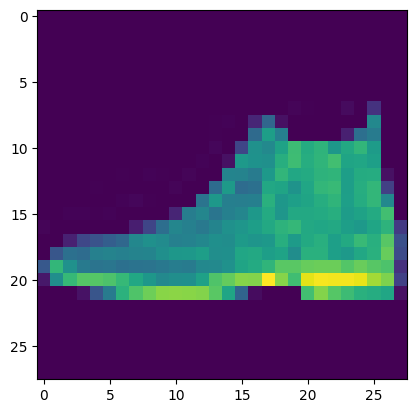

In [ ]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show